In [134]:
import pandas as pd
import numpy as np

In [135]:
df = pd.read_csv('US_VitalStatistics/Underlying Cause of Death, 2003.txt',sep='\t')

In [136]:
df

,Notes,County,County Code,Year,Year Code,Drug/Alcohol Induced Cause,Drug/Alcohol Induced Cause Code,Deaths
0,NaN,"Autauga County, AL",1001.0,2003.0,2003.0,All other non-drug and non-alcohol causes,O9,397.0
1,NaN,"Baldwin County, AL",1003.0,2003.0,2003.0,Drug poisonings (overdose) Unintentional (X40-...,D1,10.0
2,NaN,"Baldwin County, AL",1003.0,2003.0,2003.0,All other alcohol-induced causes,A9,14.0
3,NaN,"Baldwin County, AL",1003.0,2003.0,2003.0,All other non-drug and non-alcohol causes,O9,1479.0
4,NaN,"Barbour County, AL",1005.0,2003.0,2003.0,All other non-drug and non-alcohol causes,O9,287.0
...,...,...,...,...,...,...,...,...
4097,Suggested Citation: Centers for Disease Contro...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4098,"1999-2017 on CDC WONDER Online Database, relea...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4099,compiled from data provided by the 57 vital st...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4100,at http://wonder.cdc.gov/ucd-icd10.html on Oct...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
cause_of_death = df[['County','Year','Drug/Alcohol Induced Cause','Drug/Alcohol Induced Cause Code','Deaths']]

In [138]:
cause_of_death[['Drug/Alcohol Induced Cause','Drug/Alcohol Induced Cause Code']].value_counts()

Drug/Alcohol Induced Cause                          Drug/Alcohol Induced Cause Code
All other non-drug and non-alcohol causes           O9                                 3107
All other alcohol-induced causes                    A9                                  402
Drug poisonings (overdose) Unintentional (X40-X44)  D1                                  375
Drug poisonings (overdose) Suicide (X60-X64)        D2                                   89
Drug poisonings (overdose) Undetermined (Y10-Y14)   D4                                   57
All other drug-induced causes                       D9                                   56
Alcohol poisonings (overdose) (X45, X65, Y15)       A1                                    1
dtype: int64

In [139]:
death_code = ['D1','D2', 'D4']
new=cause_of_death[cause_of_death['Drug/Alcohol Induced Cause Code'].isin(death_code)]
new

,County,Year,Drug/Alcohol Induced Cause,Drug/Alcohol Induced Cause Code,Deaths
1,"Baldwin County, AL",2003.0,Drug poisonings (overdose) Unintentional (X40-...,D1,10.0
38,"Jefferson County, AL",2003.0,Drug poisonings (overdose) Unintentional (X40-...,D1,37.0
54,"Mobile County, AL",2003.0,Drug poisonings (overdose) Unintentional (X40-...,D1,26.0
78,"Anchorage Borough, AK",2003.0,Drug poisonings (overdose) Unintentional (X40-...,D1,31.0
91,"Matanuska-Susitna Borough, AK",2003.0,Drug poisonings (overdose) Unintentional (X40-...,D1,11.0
...,...,...,...,...,...
3985,"Dane County, WI",2003.0,Drug poisonings (overdose) Unintentional (X40-...,D1,24.0
4017,"Milwaukee County, WI",2003.0,Drug poisonings (overdose) Unintentional (X40-...,D1,120.0
4018,"Milwaukee County, WI",2003.0,Drug poisonings (overdose) Suicide (X60-X64),D2,20.0
4033,"Racine County, WI",2003.0,Drug poisonings (overdose) Unintentional (X40-...,D1,13.0


In [140]:
new.to_csv('death_drug_overdose.csv',index=False)

In [141]:
years = ['2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']

In [142]:
dfs = [] 
for year in years:
    df = pd.read_csv('US_VitalStatistics/Underlying Cause of Death, '+year+'.txt',sep='\t')
    cause_of_death = df[['County','Year','Drug/Alcohol Induced Cause','Drug/Alcohol Induced Cause Code','Deaths']]
    death_code = ['D1','D2', 'D4']
    new=cause_of_death[cause_of_death['Drug/Alcohol Induced Cause Code'].isin(death_code)]
    dfs.append(new)
#    new.to_csv('death_drug_overdose_'+year+'.csv',index=False)

In [143]:
all = pd.concat(dfs)

In [144]:
all.to_csv('death_drug_overdose_all_years.csv',index=False)

In [145]:
all

,County,Year,Drug/Alcohol Induced Cause,Drug/Alcohol Induced Cause Code,Deaths
1,"Baldwin County, AL",2003.0,Drug poisonings (overdose) Unintentional (X40-...,D1,10.0
38,"Jefferson County, AL",2003.0,Drug poisonings (overdose) Unintentional (X40-...,D1,37.0
54,"Mobile County, AL",2003.0,Drug poisonings (overdose) Unintentional (X40-...,D1,26.0
78,"Anchorage Borough, AK",2003.0,Drug poisonings (overdose) Unintentional (X40-...,D1,31.0
91,"Matanuska-Susitna Borough, AK",2003.0,Drug poisonings (overdose) Unintentional (X40-...,D1,11.0
...,...,...,...,...,...
4744,"Waukesha County, WI",2015.0,Drug poisonings (overdose) Unintentional (X40-...,D1,34
4750,"Winnebago County, WI",2015.0,Drug poisonings (overdose) Unintentional (X40-...,D1,22
4760,"Fremont County, WY",2015.0,Drug poisonings (overdose) Unintentional (X40-...,D1,10
4766,"Laramie County, WY",2015.0,Drug poisonings (overdose) Unintentional (X40-...,D1,13


In [146]:
all['State'] = all['County'].str.split(',').str[1].str.strip()

In [147]:
all

,County,Year,Drug/Alcohol Induced Cause,Drug/Alcohol Induced Cause Code,Deaths,State
1,"Baldwin County, AL",2003.0,Drug poisonings (overdose) Unintentional (X40-...,D1,10.0,AL
38,"Jefferson County, AL",2003.0,Drug poisonings (overdose) Unintentional (X40-...,D1,37.0,AL
54,"Mobile County, AL",2003.0,Drug poisonings (overdose) Unintentional (X40-...,D1,26.0,AL
78,"Anchorage Borough, AK",2003.0,Drug poisonings (overdose) Unintentional (X40-...,D1,31.0,AK
91,"Matanuska-Susitna Borough, AK",2003.0,Drug poisonings (overdose) Unintentional (X40-...,D1,11.0,AK
...,...,...,...,...,...,...
4744,"Waukesha County, WI",2015.0,Drug poisonings (overdose) Unintentional (X40-...,D1,34,WI
4750,"Winnebago County, WI",2015.0,Drug poisonings (overdose) Unintentional (X40-...,D1,22,WI
4760,"Fremont County, WY",2015.0,Drug poisonings (overdose) Unintentional (X40-...,D1,10,WY
4766,"Laramie County, WY",2015.0,Drug poisonings (overdose) Unintentional (X40-...,D1,13,WY


In [148]:
state_need = ['MI','NC', 'OH','MO','GA','AZ','PA','VA','WA','MA','FL','TX']
NEW=all[all['State'].isin(state_need)]
NEW

,County,Year,Drug/Alcohol Induced Cause,Drug/Alcohol Induced Cause Code,Deaths,State
106,"Cochise County, AZ",2003.0,Drug poisonings (overdose) Unintentional (X40-...,D1,11.0,AZ
109,"Coconino County, AZ",2003.0,Drug poisonings (overdose) Unintentional (X40-...,D1,11.0,AZ
116,"Maricopa County, AZ",2003.0,Drug poisonings (overdose) Unintentional (X40-...,D1,273.0,AZ
117,"Maricopa County, AZ",2003.0,Drug poisonings (overdose) Suicide (X60-X64),D2,63.0,AZ
118,"Maricopa County, AZ",2003.0,Drug poisonings (overdose) Undetermined (Y10-Y14),D4,32.0,AZ
...,...,...,...,...,...,...
4547,"Spokane County, WA",2015.0,Drug poisonings (overdose) Unintentional (X40-...,D1,74,WA
4548,"Spokane County, WA",2015.0,Drug poisonings (overdose) Suicide (X60-X64),D2,18,WA
4552,"Thurston County, WA",2015.0,Drug poisonings (overdose) Unintentional (X40-...,D1,26,WA
4558,"Whatcom County, WA",2015.0,Drug poisonings (overdose) Unintentional (X40-...,D1,23,WA


In [149]:
df1 = pd.read_csv('Population/population2000-2010.csv',encoding='latin-1')
df1

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,ESTIMATESBASE2000,POPESTIMATE2000,POPESTIMATE2001,POPESTIMATE2002,POPESTIMATE2003,POPESTIMATE2004,POPESTIMATE2005,POPESTIMATE2006,POPESTIMATE2007,POPESTIMATE2008,POPESTIMATE2009,CENSUS2010POP,POPESTIMATE2010
0,40,3,6,1,0,Alabama,Alabama,4447207,4452173,4467634,4480089,4503491,4530729,4569805,4628981,4672840,4718206,4757938,4779736,4785298
1,50,3,6,1,1,Alabama,Autauga County,43751,44021,44889,45909,46800,48366,49676,51328,52405,53277,54135,54571,54632
2,50,3,6,1,3,Alabama,Baldwin County,140416,141342,144875,147957,151509,156266,162183,168121,172404,175827,179406,182265,183195
3,50,3,6,1,5,Alabama,Barbour County,29042,29015,28863,28653,28594,28287,28027,27861,27757,27808,27657,27457,27411
4,50,3,6,1,7,Alabama,Bibb County,19856,19913,21028,21199,21399,21721,22042,22099,22438,22705,22941,22915,22867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,50,4,8,56,37,Wyoming,Sweetwater County,37620,37552,36899,37428,37450,38026,38739,39749,41470,42358,44133,43806,43621
3190,50,4,8,56,39,Wyoming,Teton County,18257,18381,18653,18837,19066,19467,19632,20014,20472,20988,21232,21294,21302
3191,50,4,8,56,41,Wyoming,Uinta County,19745,19666,19413,19587,19480,19470,19494,19709,20171,20613,21054,21118,21137
3192,50,4,8,56,43,Wyoming,Washakie County,8292,8252,8068,7988,7976,7960,8022,7979,8169,8229,8423,8533,8556


In [150]:
for i in df1.columns:
    print (i)

SUMLEV
REGION
DIVISION
STATE
COUNTY
STNAME
CTYNAME
ESTIMATESBASE2000
POPESTIMATE2000
POPESTIMATE2001
POPESTIMATE2002
POPESTIMATE2003
POPESTIMATE2004
POPESTIMATE2005
POPESTIMATE2006
POPESTIMATE2007
POPESTIMATE2008
POPESTIMATE2009
CENSUS2010POP
POPESTIMATE2010


In [151]:
need1 = df1[['STNAME','CTYNAME','POPESTIMATE2000','POPESTIMATE2001','POPESTIMATE2002','POPESTIMATE2003','POPESTIMATE2004','POPESTIMATE2005','POPESTIMATE2006','POPESTIMATE2007','POPESTIMATE2008','POPESTIMATE2009']]
need1

,STNAME,CTYNAME,POPESTIMATE2000,POPESTIMATE2001,POPESTIMATE2002,POPESTIMATE2003,POPESTIMATE2004,POPESTIMATE2005,POPESTIMATE2006,POPESTIMATE2007,POPESTIMATE2008,POPESTIMATE2009
0,Alabama,Alabama,4452173,4467634,4480089,4503491,4530729,4569805,4628981,4672840,4718206,4757938
1,Alabama,Autauga County,44021,44889,45909,46800,48366,49676,51328,52405,53277,54135
2,Alabama,Baldwin County,141342,144875,147957,151509,156266,162183,168121,172404,175827,179406
3,Alabama,Barbour County,29015,28863,28653,28594,28287,28027,27861,27757,27808,27657
4,Alabama,Bibb County,19913,21028,21199,21399,21721,22042,22099,22438,22705,22941
...,...,...,...,...,...,...,...,...,...,...,...,...
3189,Wyoming,Sweetwater County,37552,36899,37428,37450,38026,38739,39749,41470,42358,44133
3190,Wyoming,Teton County,18381,18653,18837,19066,19467,19632,20014,20472,20988,21232
3191,Wyoming,Uinta County,19666,19413,19587,19480,19470,19494,19709,20171,20613,21054
3192,Wyoming,Washakie County,8252,8068,7988,7976,7960,8022,7979,8169,8229,8423


In [152]:
state = ['Texas','Michigan', 'North Carolina','Ohio','Missouri','Pennsylvania','Georgia','Virginia','Washington','Arizona','Florida','Massachusetts']
new1=need1[need1['STNAME'].isin(state)]
new1

,STNAME,CTYNAME,POPESTIMATE2000,POPESTIMATE2001,POPESTIMATE2002,POPESTIMATE2003,POPESTIMATE2004,POPESTIMATE2005,POPESTIMATE2006,POPESTIMATE2007,POPESTIMATE2008,POPESTIMATE2009
98,Arizona,Arizona,5160586,5273477,5396255,5510364,5652404,5839077,6029141,6167681,6280362,6343154
99,Arizona,Apache County,69507,67863,67319,68072,68161,68521,69390,69602,69883,71008
100,Arizona,Cochise County,118132,118798,119847,120638,123234,125786,127241,128206,129023,130081
101,Arizona,Coconino County,116773,118283,121308,122882,125117,127025,128695,130442,131853,133477
102,Arizona,Gila County,51332,51274,51478,51337,51423,51655,52541,53252,53437,53561
...,...,...,...,...,...,...,...,...,...,...,...,...
3036,Washington,Wahkiakum County,3835,3776,3789,3662,3729,3824,3936,3975,4033,3995
3037,Washington,Walla Walla County,55178,55072,55666,56108,56652,56569,56705,56840,57315,58103
3038,Washington,Whatcom County,167696,171172,174904,177851,181756,185450,188926,192837,196708,199865
3039,Washington,Whitman County,40754,40814,41484,41442,42158,42836,42827,42608,43802,44705


In [153]:
new1.to_csv('pop_across-12-states(2000-2009).csv',index=False)

In [154]:
df2 = pd.read_csv('Population/population2010-2020.csv',encoding='latin-1')
df2

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019,RNETMIG2020
0,40,3,6,1,0,Alabama,Alabama,4779736,4780118,4785514,...,0.680010,1.282825,1.614391,0.653828,0.730419,0.854384,1.197150,1.966095,2.677866,3.091308
1,50,3,6,1,1,Alabama,Autauga County,54571,54582,54761,...,6.236931,-5.971016,-3.773344,2.206640,-1.529706,4.954403,0.993228,-0.018021,3.486011,6.290545
2,50,3,6,1,3,Alabama,Baldwin County,182265,182263,183121,...,16.705437,17.670696,22.924288,20.300088,17.902273,21.436499,22.476720,24.846335,25.242507,26.401562
3,50,3,6,1,5,Alabama,Barbour County,27457,27454,27325,...,0.329254,-6.860371,-8.093425,-5.063857,-15.677998,-18.377839,-25.138734,-8.790155,-6.257064,0.649799
4,50,3,6,1,7,Alabama,Bibb County,22915,22904,22858,...,-4.912927,-3.789130,-5.800695,1.420612,1.286202,-0.841769,-3.235672,-7.271592,0.268980,-7.199262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43580,...,0.776433,15.410190,-4.433558,-12.751566,-13.455712,-17.688190,-20.936101,-15.589918,-10.452355,-9.510457
3190,50,4,8,56,39,Wyoming,Teton County,21294,21298,21298,...,-2.340824,2.322071,23.284369,12.672811,4.881876,1.035867,-1.543805,-13.120659,0.171505,0.383943
3191,50,4,8,56,41,Wyoming,Uinta County,21118,21121,21090,...,-17.908599,-4.151853,-10.624866,-15.022486,-10.381621,-11.424990,-18.658892,-14.135663,-8.840598,-2.177625
3192,50,4,8,56,43,Wyoming,Washakie County,8533,8528,8531,...,-12.837122,-3.084040,-1.307423,-19.048760,0.000000,-15.064998,-16.056321,-16.101642,-7.638447,-6.801848


In [155]:
for i in df2.columns:
    print (i)

SUMLEV
REGION
DIVISION
STATE
COUNTY
STNAME
CTYNAME
CENSUS2010POP
ESTIMATESBASE2010
POPESTIMATE2010
POPESTIMATE2011
POPESTIMATE2012
POPESTIMATE2013
POPESTIMATE2014
POPESTIMATE2015
POPESTIMATE2016
POPESTIMATE2017
POPESTIMATE2018
POPESTIMATE2019
POPESTIMATE2020
NPOPCHG_2010
NPOPCHG_2011
NPOPCHG_2012
NPOPCHG_2013
NPOPCHG_2014
NPOPCHG_2015
NPOPCHG_2016
NPOPCHG_2017
NPOPCHG_2018
NPOPCHG_2019
NPOPCHG_2020
BIRTHS2010
BIRTHS2011
BIRTHS2012
BIRTHS2013
BIRTHS2014
BIRTHS2015
BIRTHS2016
BIRTHS2017
BIRTHS2018
BIRTHS2019
BIRTHS2020
DEATHS2010
DEATHS2011
DEATHS2012
DEATHS2013
DEATHS2014
DEATHS2015
DEATHS2016
DEATHS2017
DEATHS2018
DEATHS2019
DEATHS2020
NATURALINC2010
NATURALINC2011
NATURALINC2012
NATURALINC2013
NATURALINC2014
NATURALINC2015
NATURALINC2016
NATURALINC2017
NATURALINC2018
NATURALINC2019
NATURALINC2020
INTERNATIONALMIG2010
INTERNATIONALMIG2011
INTERNATIONALMIG2012
INTERNATIONALMIG2013
INTERNATIONALMIG2014
INTERNATIONALMIG2015
INTERNATIONALMIG2016
INTERNATIONALMIG2017
INTERNATIONALMIG2018
IN

In [156]:
need2 = df2[['STNAME','CTYNAME','CENSUS2010POP','POPESTIMATE2010','POPESTIMATE2011','POPESTIMATE2012','POPESTIMATE2013','POPESTIMATE2014','POPESTIMATE2015','POPESTIMATE2016','POPESTIMATE2017','POPESTIMATE2018','POPESTIMATE2019','POPESTIMATE2020']]
need2

,STNAME,CTYNAME,CENSUS2010POP,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,POPESTIMATE2020
0,Alabama,Alabama,4779736,4785514,4799642,4816632,4831586,4843737,4854803,4866824,4877989,4891628,4907965,4921532
1,Alabama,Autauga County,54571,54761,55229,54970,54747,54922,54903,55302,55448,55533,55769,56145
2,Alabama,Baldwin County,182265,183121,186579,190203,194978,199306,203101,207787,212737,218071,223565,229287
3,Alabama,Barbour County,27457,27325,27344,27172,26946,26768,26300,25828,25169,24887,24657,24589
4,Alabama,Bibb County,22915,22858,22736,22657,22510,22541,22553,22590,22532,22300,22313,22136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,Wyoming,Sweetwater County,43806,43580,44000,45032,45189,44996,44780,44319,43663,43188,42917,42673
3190,Wyoming,Teton County,21294,21298,21422,21643,22335,22801,23083,23255,23383,23261,23385,23497
3191,Wyoming,Uinta County,21118,21090,20901,21008,20969,20835,20777,20711,20449,20299,20196,20215
3192,Wyoming,Washakie County,8533,8531,8451,8410,8417,8277,8282,8180,8013,7886,7824,7760


In [157]:
state = ['Texas','Michigan', 'North Carolina','Ohio','Missouri','Pennsylvania','Georgia','Virginia','Washington','Arizona','Florida','Massachusetts']
new2=need2[need2['STNAME'].isin(state)]
new2

,STNAME,CTYNAME,CENSUS2010POP,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,POPESTIMATE2020
99,Arizona,Arizona,6392017,6407342,6473416,6556344,6634690,6732873,6832810,6944767,7048088,7164228,7291843,7421401
100,Arizona,Apache County,71518,71828,72181,72231,72333,71808,71026,71418,71538,71819,71920,71875
101,Arizona,Cochise County,131346,131823,133124,132085,129664,127437,126594,125885,125048,126581,127248,127450
102,Arizona,Coconino County,134421,134624,134309,136204,136788,137675,139100,140609,141300,142914,143967,142481
103,Arizona,Gila County,53597,53565,53445,53009,53026,53074,53020,53400,53619,53833,54077,54303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3036,Washington,Wahkiakum County,3978,3983,3992,3996,4002,4008,3989,4123,4207,4343,4420,4498
3037,Washington,Walla Walla County,58781,58915,59452,59342,59387,59548,59970,60112,60683,60778,61062,61292
3038,Washington,Whatcom County,201140,201549,203503,204902,206139,208240,211942,216486,221417,225098,228675,231016
3039,Washington,Whitman County,44776,44795,45067,46660,46831,46965,48224,48912,49514,49821,50136,49500


In [158]:
new2.to_csv('pop_across-12-states(2010-2020).csv',index=False)

In [159]:
all.head()

,County,Year,Drug/Alcohol Induced Cause,Drug/Alcohol Induced Cause Code,Deaths,State
1,"Baldwin County, AL",2003.0,Drug poisonings (overdose) Unintentional (X40-...,D1,10.0,AL
38,"Jefferson County, AL",2003.0,Drug poisonings (overdose) Unintentional (X40-...,D1,37.0,AL
54,"Mobile County, AL",2003.0,Drug poisonings (overdose) Unintentional (X40-...,D1,26.0,AL
78,"Anchorage Borough, AK",2003.0,Drug poisonings (overdose) Unintentional (X40-...,D1,31.0,AK
91,"Matanuska-Susitna Borough, AK",2003.0,Drug poisonings (overdose) Unintentional (X40-...,D1,11.0,AK


In [160]:
new1.reset_index(drop=True, inplace=True)

In [161]:
new1

,STNAME,CTYNAME,POPESTIMATE2000,POPESTIMATE2001,POPESTIMATE2002,POPESTIMATE2003,POPESTIMATE2004,POPESTIMATE2005,POPESTIMATE2006,POPESTIMATE2007,POPESTIMATE2008,POPESTIMATE2009
0,Arizona,Arizona,5160586,5273477,5396255,5510364,5652404,5839077,6029141,6167681,6280362,6343154
1,Arizona,Apache County,69507,67863,67319,68072,68161,68521,69390,69602,69883,71008
2,Arizona,Cochise County,118132,118798,119847,120638,123234,125786,127241,128206,129023,130081
3,Arizona,Coconino County,116773,118283,121308,122882,125117,127025,128695,130442,131853,133477
4,Arizona,Gila County,51332,51274,51478,51337,51423,51655,52541,53252,53437,53561
...,...,...,...,...,...,...,...,...,...,...,...,...
1142,Washington,Wahkiakum County,3835,3776,3789,3662,3729,3824,3936,3975,4033,3995
1143,Washington,Walla Walla County,55178,55072,55666,56108,56652,56569,56705,56840,57315,58103
1144,Washington,Whatcom County,167696,171172,174904,177851,181756,185450,188926,192837,196708,199865
1145,Washington,Whitman County,40754,40814,41484,41442,42158,42836,42827,42608,43802,44705


In [162]:
new2.reset_index(drop=True, inplace=True)

In [163]:
new2

,STNAME,CTYNAME,CENSUS2010POP,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,POPESTIMATE2020
0,Arizona,Arizona,6392017,6407342,6473416,6556344,6634690,6732873,6832810,6944767,7048088,7164228,7291843,7421401
1,Arizona,Apache County,71518,71828,72181,72231,72333,71808,71026,71418,71538,71819,71920,71875
2,Arizona,Cochise County,131346,131823,133124,132085,129664,127437,126594,125885,125048,126581,127248,127450
3,Arizona,Coconino County,134421,134624,134309,136204,136788,137675,139100,140609,141300,142914,143967,142481
4,Arizona,Gila County,53597,53565,53445,53009,53026,53074,53020,53400,53619,53833,54077,54303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,Washington,Wahkiakum County,3978,3983,3992,3996,4002,4008,3989,4123,4207,4343,4420,4498
1142,Washington,Walla Walla County,58781,58915,59452,59342,59387,59548,59970,60112,60683,60778,61062,61292
1143,Washington,Whatcom County,201140,201549,203503,204902,206139,208240,211942,216486,221417,225098,228675,231016
1144,Washington,Whitman County,44776,44795,45067,46660,46831,46965,48224,48912,49514,49821,50136,49500


In [164]:
population_2000_2020 = new1.merge(new2,how='outer')

In [165]:
population_2000_2020

,STNAME,CTYNAME,POPESTIMATE2000,POPESTIMATE2001,POPESTIMATE2002,POPESTIMATE2003,POPESTIMATE2004,POPESTIMATE2005,POPESTIMATE2006,POPESTIMATE2007,...,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,POPESTIMATE2020
0,Arizona,Arizona,5160586,5273477,5396255,5510364,5652404,5839077,6029141,6167681,...,6473416.0,6556344.0,6634690.0,6732873.0,6832810.0,6944767.0,7048088.0,7164228.0,7291843.0,7421401.0
1,Arizona,Apache County,69507,67863,67319,68072,68161,68521,69390,69602,...,72181.0,72231.0,72333.0,71808.0,71026.0,71418.0,71538.0,71819.0,71920.0,71875.0
2,Arizona,Cochise County,118132,118798,119847,120638,123234,125786,127241,128206,...,133124.0,132085.0,129664.0,127437.0,126594.0,125885.0,125048.0,126581.0,127248.0,127450.0
3,Arizona,Coconino County,116773,118283,121308,122882,125117,127025,128695,130442,...,134309.0,136204.0,136788.0,137675.0,139100.0,140609.0,141300.0,142914.0,143967.0,142481.0
4,Arizona,Gila County,51332,51274,51478,51337,51423,51655,52541,53252,...,53445.0,53009.0,53026.0,53074.0,53020.0,53400.0,53619.0,53833.0,54077.0,54303.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142,Washington,Wahkiakum County,3835,3776,3789,3662,3729,3824,3936,3975,...,3992.0,3996.0,4002.0,4008.0,3989.0,4123.0,4207.0,4343.0,4420.0,4498.0
1143,Washington,Walla Walla County,55178,55072,55666,56108,56652,56569,56705,56840,...,59452.0,59342.0,59387.0,59548.0,59970.0,60112.0,60683.0,60778.0,61062.0,61292.0
1144,Washington,Whatcom County,167696,171172,174904,177851,181756,185450,188926,192837,...,203503.0,204902.0,206139.0,208240.0,211942.0,216486.0,221417.0,225098.0,228675.0,231016.0
1145,Washington,Whitman County,40754,40814,41484,41442,42158,42836,42827,42608,...,45067.0,46660.0,46831.0,46965.0,48224.0,48912.0,49514.0,49821.0,50136.0,49500.0


In [166]:
NEW['Year'] = NEW['Year'].astype(float)
NEW['Year'] = NEW['Year'].astype(int)
NEW['Year'] = NEW['Year'].astype(str)

/var/folders/hn/_0_krk556lb_wxhzwzg9sd8w0000gn/T/ipykernel_603/396254037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NEW['Year'] = NEW['Year'].astype(float)
/var/folders/hn/_0_krk556lb_wxhzwzg9sd8w0000gn/T/ipykernel_603/396254037.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NEW['Year'] = NEW['Year'].astype(int)
/var/folders/hn/_0_krk556lb_wxhzwzg9sd8w0000gn/T/ipykernel_603/396254037.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [167]:
NEW['County'] = NEW['County'].str.split(',').str[0].str.strip()

/var/folders/hn/_0_krk556lb_wxhzwzg9sd8w0000gn/T/ipykernel_603/1459516105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NEW['County'] = NEW['County'].str.split(',').str[0].str.strip()


In [168]:
NEW.reset_index(drop=True, inplace=True)

In [169]:
NEW.State.value_counts()

FL    645
TX    537
PA    531
OH    481
NC    456
MI    333
GA    330
WA    266
VA    241
MA    196
MO    193
AZ    172
Name: State, dtype: int64

In [170]:
NEW.replace({'Missing':np.nan},inplace=True)

/var/folders/hn/_0_krk556lb_wxhzwzg9sd8w0000gn/T/ipykernel_603/2761565380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NEW.replace({'Missing':np.nan},inplace=True)


In [171]:
NEW

,County,Year,Drug/Alcohol Induced Cause,Drug/Alcohol Induced Cause Code,Deaths,State
0,Cochise County,2003,Drug poisonings (overdose) Unintentional (X40-...,D1,11.0,AZ
1,Coconino County,2003,Drug poisonings (overdose) Unintentional (X40-...,D1,11.0,AZ
2,Maricopa County,2003,Drug poisonings (overdose) Unintentional (X40-...,D1,273.0,AZ
3,Maricopa County,2003,Drug poisonings (overdose) Suicide (X60-X64),D2,63.0,AZ
4,Maricopa County,2003,Drug poisonings (overdose) Undetermined (Y10-Y14),D4,32.0,AZ
...,...,...,...,...,...,...
4376,Spokane County,2015,Drug poisonings (overdose) Unintentional (X40-...,D1,74,WA
4377,Spokane County,2015,Drug poisonings (overdose) Suicide (X60-X64),D2,18,WA
4378,Thurston County,2015,Drug poisonings (overdose) Unintentional (X40-...,D1,26,WA
4379,Whatcom County,2015,Drug poisonings (overdose) Unintentional (X40-...,D1,23,WA


In [172]:
NEW.dropna(inplace=True)

/var/folders/hn/_0_krk556lb_wxhzwzg9sd8w0000gn/T/ipykernel_603/3001883134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NEW.dropna(inplace=True)


In [173]:
NEW['Deaths'] = NEW['Deaths'].astype(float)

/var/folders/hn/_0_krk556lb_wxhzwzg9sd8w0000gn/T/ipykernel_603/451101700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NEW['Deaths'] = NEW['Deaths'].astype(float)


In [174]:
overdose = NEW[['County','Year','Deaths','State']].groupby(['County','Year','State'],as_index=False).sum()

In [175]:
overdose

,County,Year,State,Deaths
0,Adams County,2009,PA,12.0
1,Adams County,2010,PA,10.0
2,Adams County,2012,OH,10.0
3,Adams County,2014,OH,10.0
4,Adams County,2015,OH,13.0
...,...,...,...,...
3527,Yuma County,2011,AZ,20.0
3528,Yuma County,2012,AZ,32.0
3529,Yuma County,2013,AZ,22.0
3530,Yuma County,2014,AZ,35.0


In [176]:
population_2000_2020.columns

Index(['STNAME', 'CTYNAME', 'POPESTIMATE2000', 'POPESTIMATE2001',
       'POPESTIMATE2002', 'POPESTIMATE2003', 'POPESTIMATE2004',
       'POPESTIMATE2005', 'POPESTIMATE2006', 'POPESTIMATE2007',
       'POPESTIMATE2008', 'POPESTIMATE2009', 'CENSUS2010POP',
       'POPESTIMATE2010', 'POPESTIMATE2011', 'POPESTIMATE2012',
       'POPESTIMATE2013', 'POPESTIMATE2014', 'POPESTIMATE2015',
       'POPESTIMATE2016', 'POPESTIMATE2017', 'POPESTIMATE2018',
       'POPESTIMATE2019', 'POPESTIMATE2020'],
      dtype='object')

In [177]:
pop=population_2000_2020.drop(['POPESTIMATE2010','POPESTIMATE2000','POPESTIMATE2001', 'POPESTIMATE2002','POPESTIMATE2016', 'POPESTIMATE2017', 'POPESTIMATE2018','POPESTIMATE2019', 'POPESTIMATE2020'], axis=1)
pop

,STNAME,CTYNAME,POPESTIMATE2003,POPESTIMATE2004,POPESTIMATE2005,POPESTIMATE2006,POPESTIMATE2007,POPESTIMATE2008,POPESTIMATE2009,CENSUS2010POP,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015
0,Arizona,Arizona,5510364,5652404,5839077,6029141,6167681,6280362,6343154,6392017,6473416.0,6556344.0,6634690.0,6732873.0,6832810.0
1,Arizona,Apache County,68072,68161,68521,69390,69602,69883,71008,71518,72181.0,72231.0,72333.0,71808.0,71026.0
2,Arizona,Cochise County,120638,123234,125786,127241,128206,129023,130081,131346,133124.0,132085.0,129664.0,127437.0,126594.0
3,Arizona,Coconino County,122882,125117,127025,128695,130442,131853,133477,134421,134309.0,136204.0,136788.0,137675.0,139100.0
4,Arizona,Gila County,51337,51423,51655,52541,53252,53437,53561,53597,53445.0,53009.0,53026.0,53074.0,53020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142,Washington,Wahkiakum County,3662,3729,3824,3936,3975,4033,3995,3978,3992.0,3996.0,4002.0,4008.0,3989.0
1143,Washington,Walla Walla County,56108,56652,56569,56705,56840,57315,58103,58781,59452.0,59342.0,59387.0,59548.0,59970.0
1144,Washington,Whatcom County,177851,181756,185450,188926,192837,196708,199865,201140,203503.0,204902.0,206139.0,208240.0,211942.0
1145,Washington,Whitman County,41442,42158,42836,42827,42608,43802,44705,44776,45067.0,46660.0,46831.0,46965.0,48224.0


In [178]:
pop.columns

Index(['STNAME', 'CTYNAME', 'POPESTIMATE2003', 'POPESTIMATE2004',
       'POPESTIMATE2005', 'POPESTIMATE2006', 'POPESTIMATE2007',
       'POPESTIMATE2008', 'POPESTIMATE2009', 'CENSUS2010POP',
       'POPESTIMATE2011', 'POPESTIMATE2012', 'POPESTIMATE2013',
       'POPESTIMATE2014', 'POPESTIMATE2015'],
      dtype='object')

In [179]:
pop.rename(columns={'STNAME': 'State', 'CTYNAME': 'County',
                    'POPESTIMATE2003': '2003', 'POPESTIMATE2004': '2004','POPESTIMATE2005': '2005','POPESTIMATE2006': '2006','POPESTIMATE2007': '2007',
                    'POPESTIMATE2008': '2008', 'POPESTIMATE2009': '2009','CENSUS2010POP': '2010',
                    'POPESTIMATE2011': '2011','POPESTIMATE2012': '2012','POPESTIMATE2013': '2013',
                    'POPESTIMATE2014': '2014','POPESTIMATE2015': '2015'}, inplace=True)
pop             

,State,County,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Arizona,Arizona,5510364,5652404,5839077,6029141,6167681,6280362,6343154,6392017,6473416.0,6556344.0,6634690.0,6732873.0,6832810.0
1,Arizona,Apache County,68072,68161,68521,69390,69602,69883,71008,71518,72181.0,72231.0,72333.0,71808.0,71026.0
2,Arizona,Cochise County,120638,123234,125786,127241,128206,129023,130081,131346,133124.0,132085.0,129664.0,127437.0,126594.0
3,Arizona,Coconino County,122882,125117,127025,128695,130442,131853,133477,134421,134309.0,136204.0,136788.0,137675.0,139100.0
4,Arizona,Gila County,51337,51423,51655,52541,53252,53437,53561,53597,53445.0,53009.0,53026.0,53074.0,53020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142,Washington,Wahkiakum County,3662,3729,3824,3936,3975,4033,3995,3978,3992.0,3996.0,4002.0,4008.0,3989.0
1143,Washington,Walla Walla County,56108,56652,56569,56705,56840,57315,58103,58781,59452.0,59342.0,59387.0,59548.0,59970.0
1144,Washington,Whatcom County,177851,181756,185450,188926,192837,196708,199865,201140,203503.0,204902.0,206139.0,208240.0,211942.0
1145,Washington,Whitman County,41442,42158,42836,42827,42608,43802,44705,44776,45067.0,46660.0,46831.0,46965.0,48224.0


In [180]:
pop.State.value_counts()

Texas             255
Georgia           160
Virginia          135
Missouri          116
North Carolina    101
Ohio               89
Michigan           84
Florida            68
Pennsylvania       68
Washington         40
Arizona            16
Massachusetts      15
Name: State, dtype: int64

In [181]:
overdose.State.value_counts()

FL    450
PA    433
TX    430
NC    428
OH    412
GA    308
MI    242
VA    219
WA    198
MO    165
MA    141
AZ    106
Name: State, dtype: int64

In [182]:
states = {'Texas':'TX','North Carolina':'NC', 'Missouri':'MO','Virginia':'VA','Florida':'FL','Pennsylvania':'PA','Ohio':'OH','Georgia':'GA','Washington':'WA','Arizona':'AZ','Michigan':'MI','Massachusetts':'MA'}

In [183]:
pop['State'].replace(states, inplace=True)

In [184]:
pop

,State,County,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,AZ,Arizona,5510364,5652404,5839077,6029141,6167681,6280362,6343154,6392017,6473416.0,6556344.0,6634690.0,6732873.0,6832810.0
1,AZ,Apache County,68072,68161,68521,69390,69602,69883,71008,71518,72181.0,72231.0,72333.0,71808.0,71026.0
2,AZ,Cochise County,120638,123234,125786,127241,128206,129023,130081,131346,133124.0,132085.0,129664.0,127437.0,126594.0
3,AZ,Coconino County,122882,125117,127025,128695,130442,131853,133477,134421,134309.0,136204.0,136788.0,137675.0,139100.0
4,AZ,Gila County,51337,51423,51655,52541,53252,53437,53561,53597,53445.0,53009.0,53026.0,53074.0,53020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142,WA,Wahkiakum County,3662,3729,3824,3936,3975,4033,3995,3978,3992.0,3996.0,4002.0,4008.0,3989.0
1143,WA,Walla Walla County,56108,56652,56569,56705,56840,57315,58103,58781,59452.0,59342.0,59387.0,59548.0,59970.0
1144,WA,Whatcom County,177851,181756,185450,188926,192837,196708,199865,201140,203503.0,204902.0,206139.0,208240.0,211942.0
1145,WA,Whitman County,41442,42158,42836,42827,42608,43802,44705,44776,45067.0,46660.0,46831.0,46965.0,48224.0


In [185]:
pop_each_year = pop.melt(id_vars=['State','County'],var_name='Year',value_name='Population')

In [186]:
pop_each_year

,State,County,Year,Population
0,AZ,Arizona,2003,5510364
1,AZ,Apache County,2003,68072
2,AZ,Cochise County,2003,120638
3,AZ,Coconino County,2003,122882
4,AZ,Gila County,2003,51337
...,...,...,...,...
14906,WA,Wahkiakum County,2015,3989.0
14907,WA,Walla Walla County,2015,59970.0
14908,WA,Whatcom County,2015,211942.0
14909,WA,Whitman County,2015,48224.0


In [187]:
overdose

,County,Year,State,Deaths
0,Adams County,2009,PA,12.0
1,Adams County,2010,PA,10.0
2,Adams County,2012,OH,10.0
3,Adams County,2014,OH,10.0
4,Adams County,2015,OH,13.0
...,...,...,...,...
3527,Yuma County,2011,AZ,20.0
3528,Yuma County,2012,AZ,32.0
3529,Yuma County,2013,AZ,22.0
3530,Yuma County,2014,AZ,35.0


In [188]:
overdose_pop = overdose.merge(pop_each_year,how='inner')

In [189]:
overdose_pop

,County,Year,State,Deaths,Population
0,Adams County,2009,PA,12.0,101252
1,Adams County,2010,PA,10.0,101407
2,Adams County,2012,OH,10.0,28288.0
3,Adams County,2014,OH,10.0,28060.0
4,Adams County,2015,OH,13.0,27919.0
...,...,...,...,...,...
3526,Yuma County,2011,AZ,20.0,202881.0
3527,Yuma County,2012,AZ,32.0,202520.0
3528,Yuma County,2013,AZ,22.0,202447.0
3529,Yuma County,2014,AZ,35.0,204064.0


In [190]:
overdose_pop.dropna(inplace=True)

In [191]:
overdose_pop['Death_Rate_per_100000'] = (overdose_pop['Deaths'].astype(float)/overdose_pop['Population'].astype(float))*100000

In [192]:
overdose_pop

,County,Year,State,Deaths,Population,Death_Rate_per_100000
0,Adams County,2009,PA,12.0,101252,11.851618
1,Adams County,2010,PA,10.0,101407,9.861252
2,Adams County,2012,OH,10.0,28288.0,35.350679
3,Adams County,2014,OH,10.0,28060.0,35.637919
4,Adams County,2015,OH,13.0,27919.0,46.563272
...,...,...,...,...,...,...
3526,Yuma County,2011,AZ,20.0,202881.0,9.857996
3527,Yuma County,2012,AZ,32.0,202520.0,15.800909
3528,Yuma County,2013,AZ,22.0,202447.0,10.867042
3529,Yuma County,2014,AZ,35.0,204064.0,17.151482


In [193]:
overdose_pop.to_csv('merged_pop_drug_death.csv',index=False)

In [194]:
import matplotlib.pyplot as plt

In [195]:
overdose_pop_FL = overdose_pop[overdose_pop['State']=='FL']

In [196]:
overdose_pop_FL['Year'] = overdose_pop_FL['Year'].astype(int)

/var/folders/hn/_0_krk556lb_wxhzwzg9sd8w0000gn/T/ipykernel_603/3970578045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overdose_pop_FL['Year'] = overdose_pop_FL['Year'].astype(int)


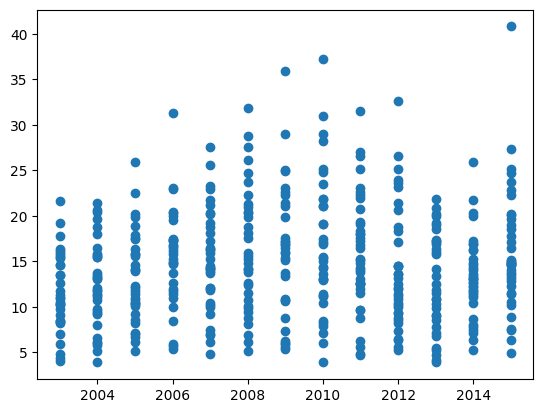

In [197]:
plt.scatter(overdose_pop_FL['Year'],overdose_pop_FL['Death_Rate_per_100000'])

In [198]:
overdose_pop_FL[overdose_pop_FL['Year']==2015]

,County,Year,State,Deaths,Population,Death_Rate_per_100000
13,Alachua County,2015,FL,23.0,259215.0,8.872943
119,Bay County,2015,FL,25.0,181678.0,13.760609
277,Brevard County,2015,FL,155.0,566133.0,27.378725
303,Broward County,2015,FL,279.0,1885435.0,14.797646
522,Charlotte County,2015,FL,11.0,172607.0,6.372859
604,Citrus County,2015,FL,25.0,140397.0,17.806648
667,Clay County,2015,FL,41.0,202552.0,20.241716
760,Collier County,2015,FL,48.0,356288.0,13.472247
785,Columbia County,2015,FL,10.0,68277.0,14.646221
1006,Duval County,2015,FL,169.0,911106.0,18.548885


In [199]:
overdose[overdose['Year']=='2015']

,County,Year,State,Deaths
4,Adams County,2015,OH,13.0
13,Alachua County,2015,FL,23.0
23,Alamance County,2015,NC,14.0
25,Alexander County,2015,NC,11.0
27,Alexandria city,2015,VA,11.0
...,...,...,...,...
3480,Wyoming County,2015,PA,10.0
3495,Yakima County,2015,WA,26.0
3508,Yavapai County,2015,AZ,56.0
3521,York County,2015,PA,84.0


In [200]:
NEW[(NEW['Year']=='2015')&(NEW['State']=='FL')]

,County,Year,Drug/Alcohol Induced Cause,Drug/Alcohol Induced Cause Code,Deaths,State
3976,Alachua County,2015,Drug poisonings (overdose) Unintentional (X40-...,D1,23.0,FL
3977,Bay County,2015,Drug poisonings (overdose) Unintentional (X40-...,D1,25.0,FL
3978,Brevard County,2015,Drug poisonings (overdose) Unintentional (X40-...,D1,132.0,FL
3979,Brevard County,2015,Drug poisonings (overdose) Suicide (X60-X64),D2,23.0,FL
3980,Broward County,2015,Drug poisonings (overdose) Unintentional (X40-...,D1,252.0,FL
3981,Broward County,2015,Drug poisonings (overdose) Suicide (X60-X64),D2,27.0,FL
3982,Charlotte County,2015,Drug poisonings (overdose) Unintentional (X40-...,D1,11.0,FL
3983,Citrus County,2015,Drug poisonings (overdose) Unintentional (X40-...,D1,25.0,FL
3984,Clay County,2015,Drug poisonings (overdose) Unintentional (X40-...,D1,41.0,FL
3985,Collier County,2015,Drug poisonings (overdose) Unintentional (X40-...,D1,48.0,FL
